In [1]:
import ROOT
from hep_utils.constants import N_RINGS, RINGS_LAYERS
from hep_utils.root import get_column_names, rdf_to_pandas, open_vector
from hep_utils import formulas
from lzt_utils.dataset import LztDataset
import hep_utils.plotting.pyplot as hplt
import mplhep as hep
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from typing import Dict
import os
from collections import OrderedDict
ROOT.EnableImplicitMT()
plt.style.use(hep.style.ROOT)

Module libc not found.


Welcome to JupyROOT 6.28/02


In [2]:
properties = ['dirpath', 'base_filename', 'rdf']
datasets: Dict[str, LztDataset] = OrderedDict()
datasets['gg2H2ZZ2ee'] = LztDataset.from_dir('/root/data/2024_08_19_10_41_0000000000_lorenzetti_gg2H2ZZ2ee')
datasets['Overlapped Zee'] = LztDataset.from_dir('/root/data/2024_07_20_15_20_1721503228_overlapping_zee')
datasets['Zee'] = LztDataset.from_dir('/root/data/2024_08_19_21_08_0000000000_zee')
datasets['electron'] = LztDataset.from_dir('/root/data/2024_08_19_21_18_0000000000_single_electron')
pdfs = {}
for ds_name, dataset in datasets.items():
    rdf = dataset.get_ntuple_rdf()
    rings_cols, rdf = open_vector('rings', N_RINGS, rdf)
    column_names = get_column_names(rdf)
    pdf = rdf_to_pandas(rdf, [name for name in column_names if name != 'rings'], nrows=-1)
    pdfs[ds_name] = pdf
    print(f"{ds_name}: {dataset}")

gg2H2ZZ2ee: LztDataset(path=/root/data/2024_08_19_10_41_0000000000_lorenzetti_gg2H2ZZ2ee, label=gg->H->ZZ->eeqq (e only))
Overlapped Zee: LztDataset(path=/root/data/2024_07_20_15_20_1721503228_overlapping_zee, label=Overlapped Z->ee)
Zee: LztDataset(path=/root/data/2024_08_19_21_08_0000000000_zee, label=Z->ee)
electron: LztDataset(path=/root/data/2024_08_19_21_18_0000000000_single_electron, label=el [15, 2000] GeV)


In [3]:
output_dir = '/root/data/dataset_comparisons'
os.makedirs(output_dir, exist_ok=True)

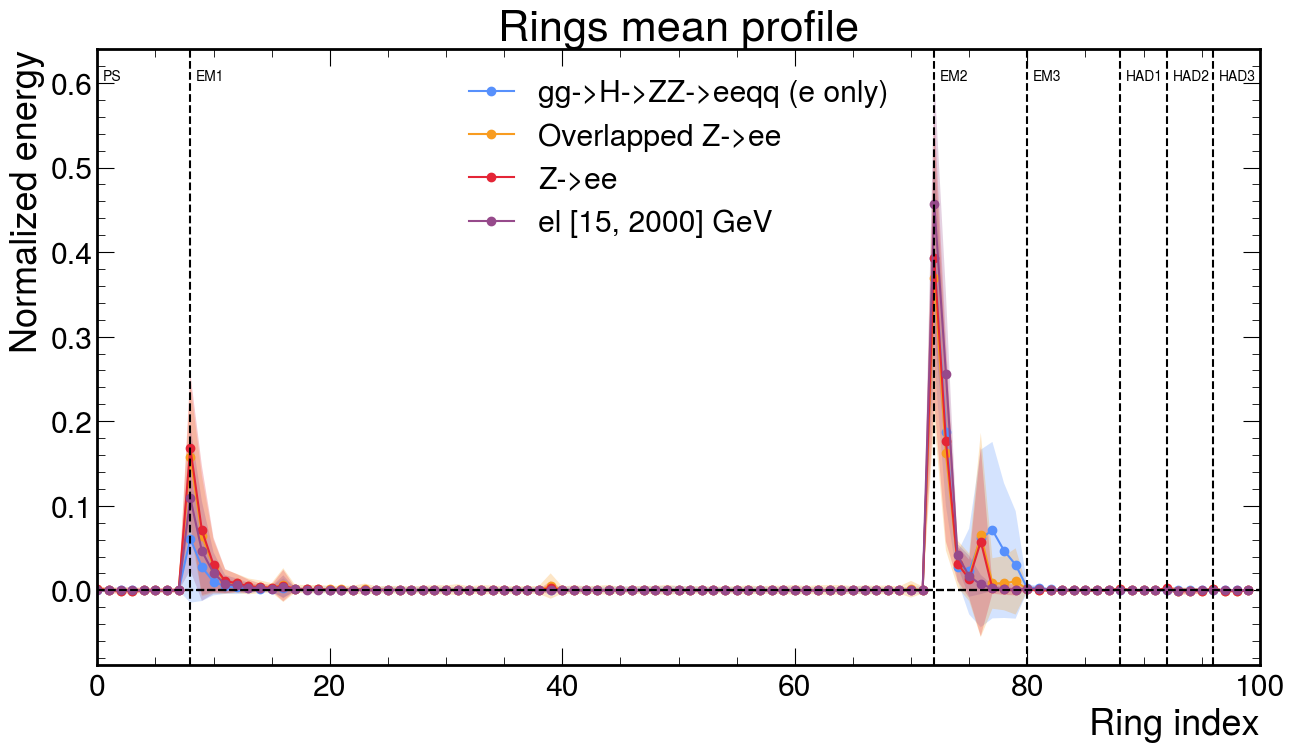

In [4]:
fig, ax = plt.subplots(figsize=(15, 8))
n_datasets = len(datasets)
for i, (ds_name, ds) in enumerate(datasets.items()):
    pdf = pdfs[ds_name]
    hplt.plot_rings_profile(pdf[rings_cols], ax, normalize=True, label=ds.label, add_rings_labels=(i ==  n_datasets-1))
fig.savefig(os.path.join(output_dir, 'rings_profile_comparison.png'), bbox_inches='tight', dpi=300)